### In-class Coding: Session 1 - Gradient Descent

In [1]:
# from learnThu8 import *
import learn
import numpy as np
import matplotlib
%matplotlib inline

Loaded learn.py


In [2]:
# Generic gradient descent:
# - f is a function mapping a vector of parameters to a score
#     (not strictly necessary)
# - df is a function mapping a vector of parameters to the gradient at
#     that point
# - x0 is an initial parameter vector
# - step_size is the step size
#
#
# - terminates after max_iter iterations, or when parameters have not changed
#    by more than eps from one iteration to the next
#   in every iteration updates the current param vector by the gradient
# Returns: the final parameter vector, a list of scores (one per iteration)
#   and a list of parameter vectors (one per iteration)

def gd_mine(f, df, x0, step_size = .01, max_iter = 1000, eps = .00001):
    x = x0 # final parameter
    fs = [] # list of scores
    xs = [] # list of param vectors
    
#     print('oldx:\n',x)

    for iter in range(max_iter): # dont do it
        # get the current score
        fcurrent = f(x)
        fs.append(fcurrent)
#         print('\nscore:',fcurrent)
        
        # get gradient and add to current
        xs.append(x)
        grad_current = df(x) 
        x -= step_size * grad_current # * fcurrent
#         print('\nnewx:\n',x)
        
        # early termination
        if (np.absolute(step_size*grad_current) < eps).all():
            #print('\ndiff:\n', np.absolute(step_size*grad_current))
            #print('breaking')
            break
#     print('\n\nx\n',x,'\nfs\n',fs,'\nxs\n',xs,'\n\n')
    return x, fs, xs

# override the defined gd()
learn.gd = gd_mine

ss 0.01 x -1.4998883384694506


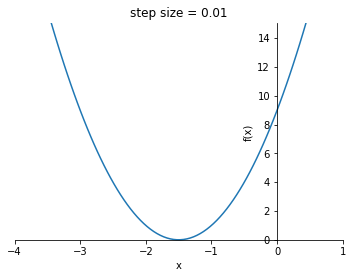

ss 0.001 x -1.4987628867928702


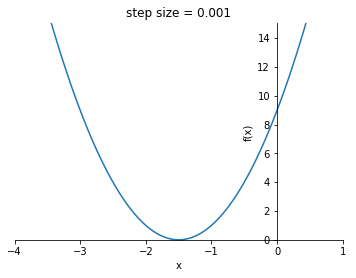

ss 0.0001 x -0.8262223122826007


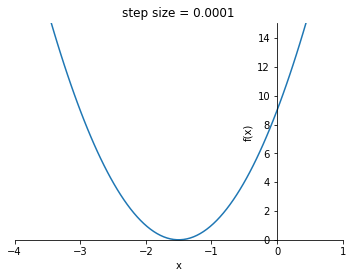

ss 1e-05 x -0.11532991160775061


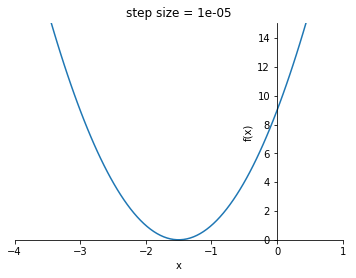

ss 1e-06 x -0.011952175362194173


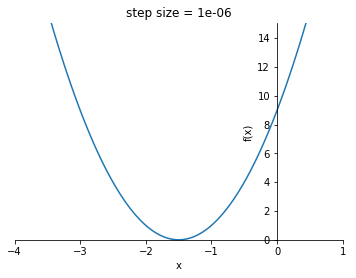

In [12]:
learn.tGD([1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

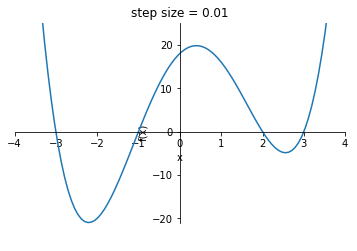

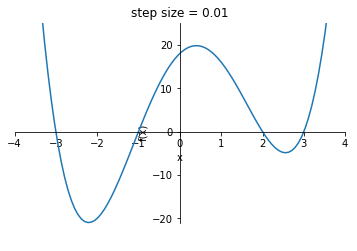

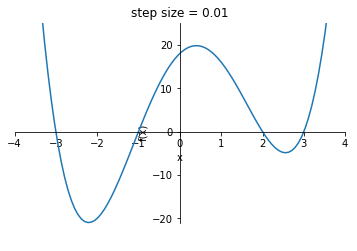

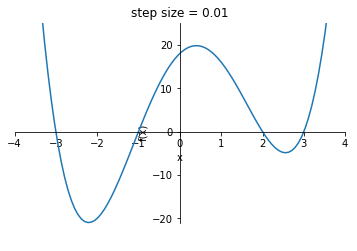

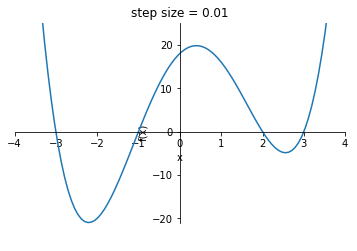

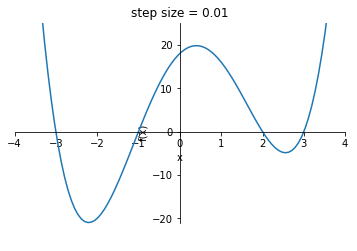

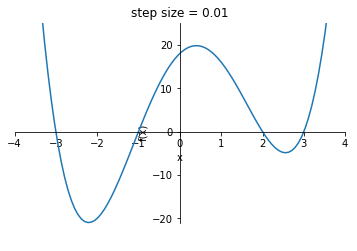

In [4]:
_ = [learn.tGD2(i) for i in [-4, -2, -1, 0, 1, 2, 4]]

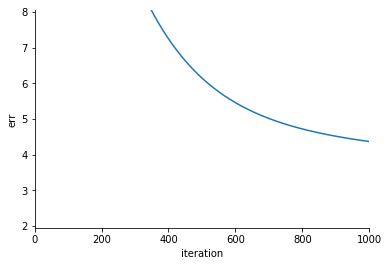

lr 0.0001 w [[0.12986775 0.20584788]] err 4.371379810132389


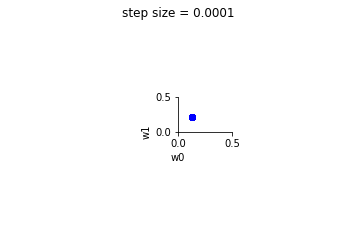

lr 0.001 w [[ 0.6369359  -0.93062897]] err 2.2548813949453073


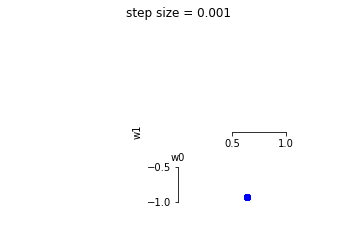

lr 0.01 w [[ 0.81987894 -1.26721231]] err 2.1365410755501224


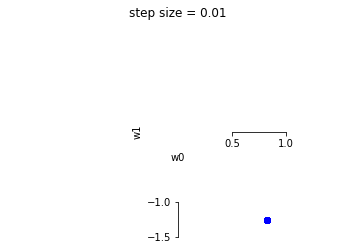

lr 0.05 w [[ 0.82015078 -1.26771244]] err 2.136540687878652


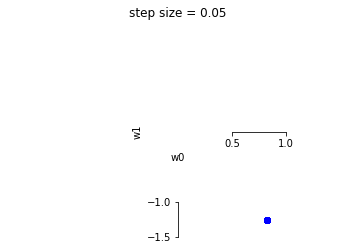

lr 0.07 w [[ 0.82017068 -1.26774906]] err 2.1365406798654796


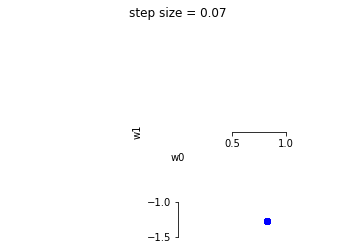

lr 0.075 w [[ 0.82021687 -1.26782337]] err 2.136540672490052


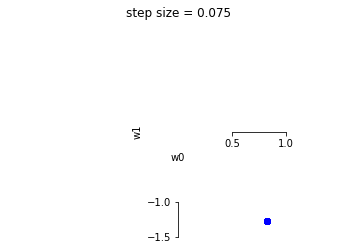

lr 0.1 w [[3.56896809e+188 1.93984017e+188]] err nan


C:\Users\Kygrykhon\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\Kygrykhon\arti-intel\week2\learn.py:103: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(X*w - y)) + l * float(w.T * w)


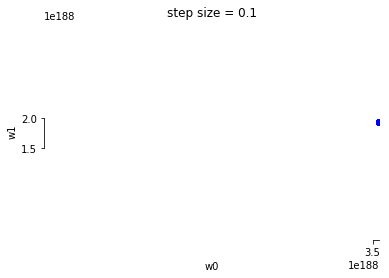

In [5]:
# test the entire algorithm
learn.t6()

### In-class Coding: Session 2. Logistic Regression

In [6]:
import learn_wk9

In [7]:
# Logistic regression using stochastic gradient descent.
# X is a matrix of feature vectors; y is a vector of labels in {0, 1}
# w0 is the initial weight vector
# max_iter is as for gd
# l currently unused, but can be used for regularization
# Returns: final weight vector, a list of scores, list of weight vectors

def sgdLogReg_modified(X, y, l = 0, step_size = 0.01, w0 = None, max_iter = 1000,
                 eps = .00001):
    # w is d by 1; X is n by d
    # return result is d by 1

    # Look at gdLogReg in learn.py
    # define f and df
    # Your code here
    
    def log_loss(w, X, y):
        fx = np.matmul(X, w)
        hx = np.divide(np.exp(fx), 1-np.exp(fx))
        log_hx = np.log(hx)
        log_revhx = np.log(1-hx)
        return np.matmul(Y.T, log_hx) + np.matmul(1-Y.T, log_revhx)
    
    def logloss_derivative(w, X, y):
        fx = np.matmul(X, w)
        hx = np.divide(np.exp(fx), 1-np.exp(fx))
        return np.matmul(X.T, (hx - y))
    
    f = log_loss
    df = logloss_derivative
    
    
    if w0 is None: w0 = np.matrix(np.ones(X.shape[1])).T * 0.0000001
    return sgd(X, y, f, df, w0, step_size = step_size, max_iter = max_iter,
               eps = eps)

learn_wk9.sgdLogReg = sgdLogReg_modified

In [8]:
#learn_wk9.txor_more() # buggy 